This is the classification task performed by using the Random Forest classifier. The aim of the task is to predict the disease label based on the input represented as a raw text which includes the description of symptoms. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Set a seed value to allow reproducibility
np.random.seed(42)

In [3]:
# Load and inspect data
data = pd.read_csv("/kaggle/input/symptom2disease/Symptom2Disease.csv")
data.head(10)

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
5,5,Psoriasis,The skin on my palms and soles is thickened an...
6,6,Psoriasis,"The skin around my mouth, nose, and eyes is re..."
7,7,Psoriasis,My skin is very sensitive and reacts easily to...
8,8,Psoriasis,I have noticed a sudden peeling of skin at dif...
9,9,Psoriasis,The skin on my genitals is red and inflamed. I...


In [4]:
# Data shape
data.shape

(1200, 3)

In [5]:
# Inspect unique label values
labels = data['label'].unique()
print(f"Unique labels:\n{labels}")

Unique labels:
['Psoriasis' 'Varicose Veins' 'Typhoid' 'Chicken pox' 'Impetigo' 'Dengue'
 'Fungal infection' 'Common Cold' 'Pneumonia' 'Dimorphic Hemorrhoids'
 'Arthritis' 'Acne' 'Bronchial Asthma' 'Hypertension' 'Migraine'
 'Cervical spondylosis' 'Jaundice' 'Malaria' 'urinary tract infection'
 'allergy' 'gastroesophageal reflux disease' 'drug reaction'
 'peptic ulcer disease' 'diabetes']


In [6]:
# Convert text into the corresponding numerical form using TFIDF approach
tfidfconverter = TfidfVectorizer(max_features=1500,
                                 min_df=5,
                                 max_df=0.7,
                                 stop_words=list(text.ENGLISH_STOP_WORDS)
                                 )

X = tfidfconverter.fit_transform(data.text).toarray()

In [7]:
# Divide data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    data['label'],
                                                    test_size=0.3)

In [8]:
# Use grid search to compute the
# optimum values of hyperparameters

parameters = {"n_estimators": [n for n in range(100, 1500, 100)],
              "max_depth": [i for i in range(35, 100, 10)]
              }

rfc = RandomForestClassifier()
grid_scv = GridSearchCV(rfc,
                        param_grid=parameters,
                        cv=3,
                        n_jobs=-1
                        )

grid_scv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [35, 45, 55, 65, 75, 85, 95],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200, 1300,
                                          1400]})

In [9]:
# Inspect results of grid search and
# Get best parameters for the model

means = grid_scv.cv_results_['mean_test_score']
stds = grid_scv.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_scv.cv_results_['params']):
    print(f'{mean:.3f} (+/-{2*std:.3f}) for {params}')

print(f'\nBest parameters set found for the model:\n{grid_scv.best_params_}\n')

0.905 (+/-0.066) for {'max_depth': 35, 'n_estimators': 100}
0.908 (+/-0.018) for {'max_depth': 35, 'n_estimators': 200}
0.902 (+/-0.019) for {'max_depth': 35, 'n_estimators': 300}
0.907 (+/-0.025) for {'max_depth': 35, 'n_estimators': 400}
0.896 (+/-0.032) for {'max_depth': 35, 'n_estimators': 500}
0.901 (+/-0.029) for {'max_depth': 35, 'n_estimators': 600}
0.901 (+/-0.024) for {'max_depth': 35, 'n_estimators': 700}
0.907 (+/-0.027) for {'max_depth': 35, 'n_estimators': 800}
0.910 (+/-0.033) for {'max_depth': 35, 'n_estimators': 900}
0.908 (+/-0.029) for {'max_depth': 35, 'n_estimators': 1000}
0.904 (+/-0.035) for {'max_depth': 35, 'n_estimators': 1100}
0.906 (+/-0.022) for {'max_depth': 35, 'n_estimators': 1200}
0.907 (+/-0.027) for {'max_depth': 35, 'n_estimators': 1300}
0.904 (+/-0.023) for {'max_depth': 35, 'n_estimators': 1400}
0.912 (+/-0.012) for {'max_depth': 45, 'n_estimators': 100}
0.907 (+/-0.015) for {'max_depth': 45, 'n_estimators': 200}
0.904 (+/-0.052) for {'max_depth': 

In [10]:
# Train the model using the best parameters found
# and get the score

rfc = RandomForestClassifier(n_estimators=grid_scv.best_params_['n_estimators'],
                             max_depth=grid_scv.best_params_['max_depth'])
rfc.fit(x_train, y_train)

score = rfc.score(x_test, y_test)
print(f"Score: {score}")

Score: 0.9444444444444444


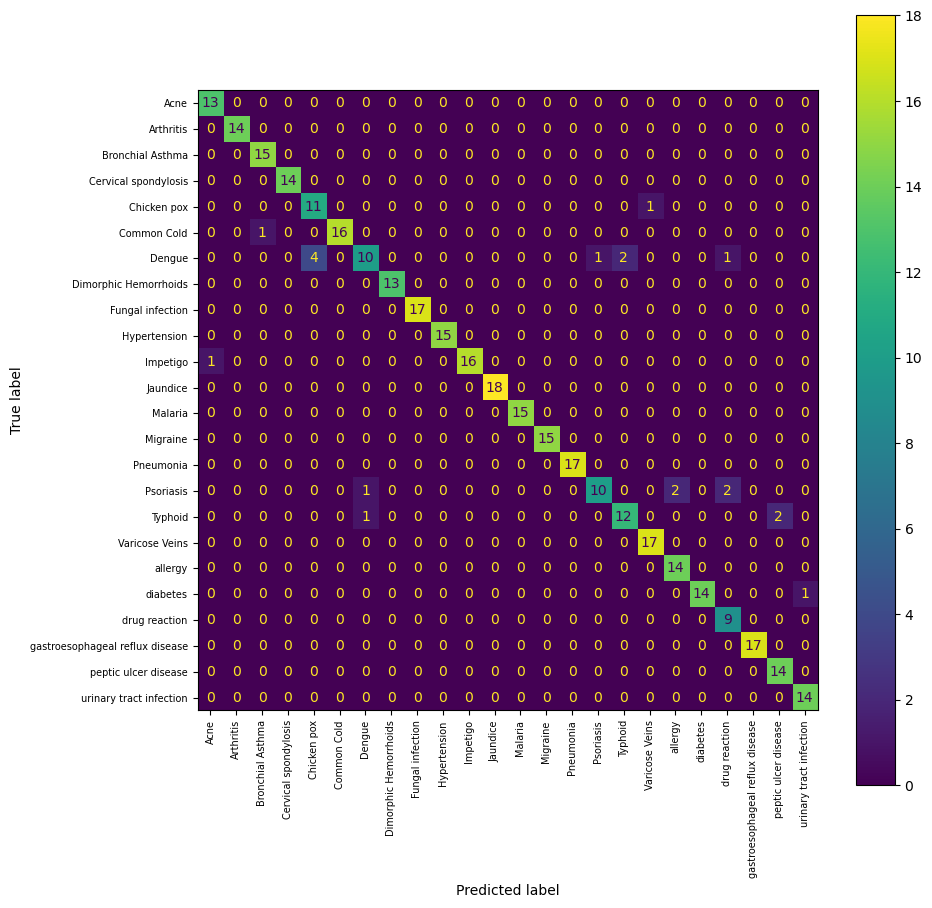

In [11]:
# Create and plot the confusion matrix

y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
disp.plot(ax=ax, xticks_rotation='vertical')
plt.show()